# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [1207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [1208]:
df = pd.read_csv(r'D:\Documentos Mauricio\Desktop\Diplomatura FAMAF2022\4- Aprendizaje Supervisado\Descarga Clase 3 y 4\AprendizajeSupervisado-master\Práctico\train.csv')
print(df.shape)
print(df.describe())
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
y = df.Transported
X = df.drop('Transported',axis=1)
X

(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7669.000000   7668.000000   7635.000000   
mean   4345.691039    28.879389    226.078237    455.643062    172.600393   
std    2504.576803    14.461548    679.180148   1621.290107    597.923749   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    19.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    38.000000     44.000000     69.000000     28.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7665.000000   7654.000000  7823.000000  
mean     305.023222    295.476744     0.506711  
std     1133.423579   1093.485752     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend


In [1209]:
df.Destination.value_counts()

TRAPPIST-1e      5316
55 Cancri e      1625
PSO J318.5-22     722
Name: Destination, dtype: int64

### Algún análisis exploratorio que permita tomar decisiones sobre las variabes a usar, transformaciones de variables, tratamiento de los datos faltantes, etc. etc.

In [1210]:
# Elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676
...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610


In [1211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7823 non-null   float64
 1   CryoSleep     7823 non-null   float64
 2   Destination   7823 non-null   float64
 3   Age           7823 non-null   float64
 4   VIP           7823 non-null   float64
 5   RoomService   7823 non-null   float64
 6   FoodCourt     7823 non-null   float64
 7   ShoppingMall  7823 non-null   float64
 8   Spa           7823 non-null   float64
 9   VRDeck        7823 non-null   float64
dtypes: float64(10)
memory usage: 611.3 KB


In [1212]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [1213]:
clfs = [DecisionTreeClassifier(random_state=0)]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    #plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 93.90%
Accuracy test {name}: 72.40%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [1214]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=10),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

In [1215]:
#!pip install ConfusionMatrixDisplay

In [1216]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
#ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))
## 76.10% es el valor base de error en test que determinó el profe

Accuracy train Arbol de decisión: 81.88%
Accuracy test Arbol de decisión: 76.29%
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       748
           1       0.79      0.75      0.77       817

    accuracy                           0.76      1565
   macro avg       0.76      0.76      0.76      1565
weighted avg       0.76      0.76      0.76      1565



In [1217]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 78.51
Precisión test fold 1: 77.88
Precisión test fold 2: 78.51
Precisión test fold 3: 77.38
Precisión test fold 4: 76.34
Avg. accuracy = 77.7242359467059


In [1218]:
## PASO 1: TRABAJAR CON EL MISMO MODELO (ARBOL DE CLASIFICACION) PERO CON MÁS VARIABLES O VARIABLES OPTIMIZADAS
## CORTAMOS LA VARIABLE CABINA EN SUS TRES PARTES: CUBIERTA, NUMERO, LADO#
df[['cubierta','numero','lado']] = df['Cabin'].str.split('/', expand=True)

In [1219]:
df2 = df.copy()

In [1220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7823 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7823 non-null   float64
 8   FoodCourt     7823 non-null   float64
 9   ShoppingMall  7823 non-null   float64
 10  Spa           7823 non-null   float64
 11  VRDeck        7823 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
 14  cubierta      7639 non-null   object 
 15  numero        7639 non-null   object 
 16  lado          7639 non-null   object 
dtypes: float64(6), int64(2), object(9)
memory usage: 1.0+ MB


In [1221]:
# utilizamos cubierta y lado que no tienen mucha cardinalidad#
df.cubierta.value_counts()

F    2499
G    2294
E     792
B     698
C     680
D     435
A     237
T       4
Name: cubierta, dtype: int64

In [1222]:
df['cuad']=df.Age * df.Age
df['cub']= df.Age * df.Age *df.Age 
df['cuad2']= df.RoomService * df.RoomService 
df['int1']= df.Age * df.VRDeck




In [1223]:
print(df.shape)
print(df.describe())
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService", "cuad", "cub", "int1",  "cuad2", "numero"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
y = df.Transported
X = df.drop('Transported',axis=1)
X

(7823, 21)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7823.000000   7823.000000   7823.000000   7823.000000   
mean   4345.691039    28.840470    221.627764    446.615237    168.452512   
std    2504.576803    14.313512    673.194124   1606.401684    591.285786   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    20.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    37.000000     38.500000     56.500000     23.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported         cuad            cub  \
count   7823.000000   7823.000000  7823.000000  7823.000000    7823.000000   
mean     298.862713    289.093570     0.506711  1036.623162   42965.227023   
std     1122.738262   1082.461294     0.499987   957.802229  

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cubierta,numero,lado,cuad,cub,cuad2,int1
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,C,123.0,P,3249.0,185193.0,0.0,220818.0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,F,126.0,S,324.0,5832.0,0.0,0.0
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,B,343.0,S,1089.0,35937.0,0.0,0.0
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,F,1420.0,P,1849.0,79507.0,20164.0,8772.0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,G,9.0,P,361.0,6859.0,0.0,646.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,F,1319.0,S,144.0,1728.0,0.0,0.0
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,G,459.0,S,1936.0,85184.0,0.0,132.0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,F,1772.0,P,3025.0,166375.0,0.0,0.0
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,E,253.0,P,225.0,3375.0,0.0,300.0


In [1224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7823 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7823 non-null   float64
 8   FoodCourt     7823 non-null   float64
 9   ShoppingMall  7823 non-null   float64
 10  Spa           7823 non-null   float64
 11  VRDeck        7823 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
 14  cubierta      7639 non-null   object 
 15  numero        7823 non-null   float64
 16  lado          7639 non-null   object 
 17  cuad          7823 non-null   float64
 18  cub           7823 non-null 

In [1225]:
# AGREGAMOS CUBIERTA Y LADO QUE ESTÁN EXTRAIDAS DE CABIN YA QUE PUEDE INDICAR CLASE Y POR AHI MENOR PROBABILIDAD DE ERROR DE TRANSPORTE#
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 10:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP", "lado", "cubierta"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X



Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'cubierta', 'numero',
       'lado', 'cuad', 'cub', 'cuad2', 'int1'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cubierta,numero,lado,cuad,cub,cuad2,int1
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022,-1.289174,-0.931083,-0.989092,2.309995,2.370242,-0.125262,4.990183
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,0.333634,-0.925154,0.850144,-0.744067,-0.618829,-0.125262,-0.233635
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,-1.830110,-0.496308,0.850144,0.054688,-0.117126,-0.125262,-0.233635
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616,0.333634,1.632115,-0.989092,0.848222,0.608973,-0.120233,-0.026119
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676,0.874570,-1.156376,-0.989092,-0.705434,-0.601714,-0.125262,-0.218353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,0.333634,1.432514,0.850144,-0.932009,-0.687223,-0.125262,-0.233635
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316,0.874570,-0.267062,0.850144,0.939061,0.703581,-0.125262,-0.230513
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,0.333634,2.327756,-0.989092,2.076111,2.056638,-0.125262,-0.233635
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610,-0.207302,-0.674170,-0.989092,-0.847435,-0.659776,-0.125262,-0.226538


In [1226]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [1227]:
clfs = [DecisionTreeClassifier(random_state=0)]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    #plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 99.95%
Accuracy test {name}: 75.34%


In [1228]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(4,6,8,10,20,100),
 'min_samples_split':(5,10,15,20),
 'min_samples_leaf':(2,4,6,10),
  'max_features': ('auto', 'sqrt', 'log2')})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

In [1229]:
clf = DecisionTreeClassifier(**grid.best_params_,random_state=12).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
#ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test), digits=4))
## 76.10% es el valor base de error en test que determinó el profe

Accuracy train Arbol de decisión: 79.55%
Accuracy test Arbol de decisión: 78.40%
              precision    recall  f1-score   support

           0     0.8125    0.7126    0.7593       748
           1     0.7635    0.8494    0.8042       817

    accuracy                         0.7840      1565
   macro avg     0.7880    0.7810    0.7817      1565
weighted avg     0.7869    0.7840    0.7827      1565



In [1230]:
# MEJORA EN 1.83 PP EL ERROR EN TEST#
# EXPLORAMOS UN POCO MAS LOS DATOS##

In [1231]:
## PASO 2: TRABAJAR CON UN MODELO DE REGRESION LOGISTICA, SVM Y PERCEPTRON
# Se ajusta un modelo de Regresion Logistica
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log', random_state=0)
model.fit(x_train,y_train)
score = model.score(x_train, y_train)
print("Training score: ", score)



Training score:  0.7817193991690636


In [1232]:
from sklearn.metrics import confusion_matrix
ypred= model.predict(x_test)
cm= confusion_matrix(y_test, ypred)
print(cm)

[[502 246]
 [106 711]]


In [1233]:
# Se crea un reporte de clasificación 
from sklearn.metrics import classification_report
cr= classification_report(y_test, ypred, digits=4)
print(cr)

              precision    recall  f1-score   support

           0     0.8257    0.6711    0.7404       748
           1     0.7429    0.8703    0.8016       817

    accuracy                         0.7751      1565
   macro avg     0.7843    0.7707    0.7710      1565
weighted avg     0.7825    0.7751    0.7723      1565



In [1234]:
# Ajuste de hiperparámetros#
# Buscamos distintas combinaciones de parámetros de regularización , métodos de clasificación (SVM, Perceptron, Reg Logistica) y tasas de aprendizaje
param_grid = {
    'loss': ['log', 'perceptron', 'hinge', 'squared_hinge'],
    'alpha': [0.000095, 0.0001, 0.000105, 0.0005, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'tol': [0.046, 0.048, 0.05, 0.055, 0.07, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    
    
}

In [1235]:
from sklearn.model_selection import GridSearchCV
model2 = SGDClassifier(eta0=1, random_state=0)
cv = GridSearchCV(model2, param_grid, scoring='accuracy', cv=4,)
cv.fit(x_train, y_train);

In [1236]:
best_model = cv.best_estimator_

In [1237]:
## El modelo con mejor desempeño es el SVM con alfa igual a 0.001 y una tasa de aprendizaje "adaptive"
cv.best_params_

{'alpha': 0.0005,
 'learning_rate': 'adaptive',
 'loss': 'hinge',
 'penalty': 'elasticnet',
 'tol': 0.05}

In [1238]:
## TRABAJAMOS SOBRE LA MEJOR ESPECIFICACION SOBRE EL TEST Y OBTENEMOS LAS MÉTRICAS DE DESEMPEÑO DE ESTE
modelo_final = SGDClassifier(loss='hinge', random_state=0, alpha=0.0005, learning_rate='adaptive',eta0=1, penalty='elasticnet', tol=0.05)

In [1239]:
modelo_final.fit(x_train,y_train)

SGDClassifier(alpha=0.0005, eta0=1, learning_rate='adaptive',
              penalty='elasticnet', random_state=0, tol=0.05)

In [1240]:
ypred= modelo_final.predict(x_test)
cm2= confusion_matrix(y_test, ypred)
print(cm2)

[[541 207]
 [111 706]]


In [1241]:
cr2= classification_report(y_test, ypred, digits=4)
print(cr2)
# 79,81% de accuracy es hasta ahora nuestro mejor resultado(2.2 puntos porcentuales más que el modelo base)#

              precision    recall  f1-score   support

           0     0.8298    0.7233    0.7729       748
           1     0.7733    0.8641    0.8162       817

    accuracy                         0.7968      1565
   macro avg     0.8015    0.7937    0.7945      1565
weighted avg     0.8003    0.7968    0.7955      1565



In [1242]:
test_acc2 = accuracy_score(y_test, ypred)
print(f'Test accuracy: {test_acc2:0.4}')

Test accuracy: 0.7968


In [1243]:
## PASO 3: TRABAJAR CON RANDOM FOREST
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=700, random_state=2)
clf.fit(x_train, y_train);

In [1244]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions, digits=4))
## NOTAR QUE RANDOMFOREST MEJORA SIGNIFICATIVAMENTE LA CAPACIDAD PREDICTIVA DEL MODELO (79.87%)##

              precision    recall  f1-score   support

           0     0.7726    0.8356    0.8028       748
           1     0.8373    0.7748    0.8048       817

    accuracy                         0.8038      1565
   macro avg     0.8049    0.8052    0.8038      1565
weighted avg     0.8064    0.8038    0.8039      1565



In [1245]:
# AJUSTAMOS HIPERPARÁMETROS, PARA VER SI SE REDUCE EL ERROR DE PREDICCIÓN DEL MODELO##
grid = GridSearchCV(ensemble.RandomForestClassifier(random_state=0),
 {'max_depth':(2,5),
 'min_samples_split':(2, 5),
 'min_samples_leaf':(1, 2),
  'n_estimators':(800,1000),
  'n_jobs':(3,),})
grid.fit(x_train,y_train)
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800,
 'n_jobs': 3}

In [1246]:
clf2 = ensemble.RandomForestClassifier(**grid.best_params_,random_state=12).fit(x_train, y_train)

train_predictions = clf2.predict(x_train)
accuracy2 = accuracy_score(y_train, train_predictions)
print("Accuracy train Random Forest: %.2f%%" % (accuracy2 * 100.0))

test_predictions2 = clf2.predict(x_test)
accuracy2 = accuracy_score(y_test, test_predictions2)
print("Accuracy test Random Forest: %.2f%%" % (accuracy2 * 100.0))
#ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf2.predict(x_test), digits=4))

Accuracy train Random Forest: 79.69%
Accuracy test Random Forest: 77.83%
              precision    recall  f1-score   support

           0     0.7587    0.7861    0.7722       748
           1     0.7975    0.7711    0.7841       817

    accuracy                         0.7783      1565
   macro avg     0.7781    0.7786    0.7781      1565
weighted avg     0.7789    0.7783    0.7784      1565



In [1247]:
feature_imp = pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp[:11]

numero          0.142938
CryoSleep       0.088300
Spa             0.087970
FoodCourt       0.067738
int1            0.066079
VRDeck          0.062412
cuad2           0.062339
RoomService     0.061776
ShoppingMall    0.056128
cuad            0.056083
Age             0.055551
dtype: float64

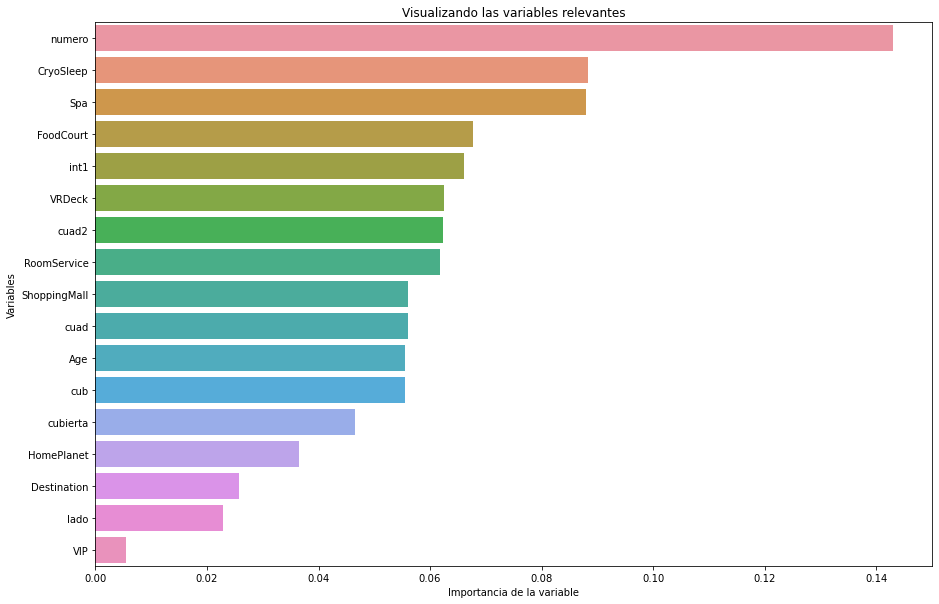

In [1248]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
# creamos el gráfico de barras
sns.barplot(x=feature_imp, y=feature_imp.index)
# agregamos estilo
plt.xlabel('Importancia de la variable')
plt.ylabel('Variables')
plt.title("Visualizando las variables relevantes")

#mostramos y cerramos gráfico
plt.show()

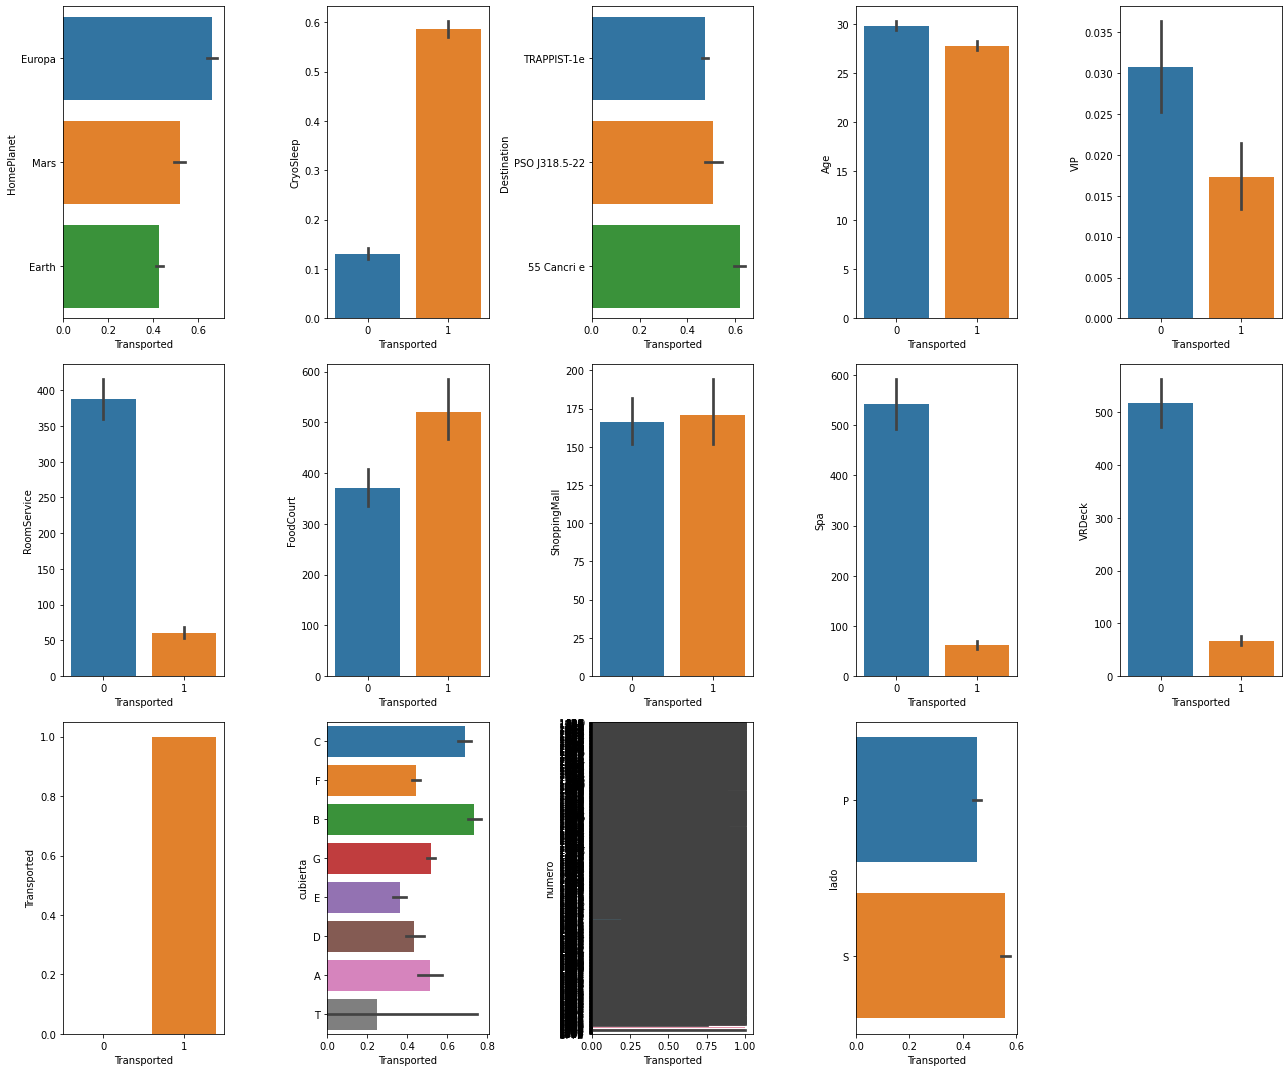

In [1249]:
## ESTUDIAMOS UN POCO MAS LAS VARIABLES E###
del df2['PassengerId']
del df2['Cabin']
#del df2['numero']
del df2['Name']
import seaborn as sns
plt.figure(figsize = (18, 15))
plotnumber = 1

for column in df2:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.barplot(x = df2['Transported'], y = df2[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [1250]:
# NO SE OBSERVAN PROBLEMAS DE ALTA CORRELACION ENTRE FEATURES#
corrM = X.corr()
corrM

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cubierta,numero,lado,cuad,cub,cuad2,int1
HomePlanet,1.000000,0.069122,0.042294,0.130960,0.051307,0.195151,0.056730,0.086639,0.043466,0.033619,-0.347673,-0.170996,0.004393,0.110660,0.088654,0.090377,0.037053
CryoSleep,0.069122,1.000000,-0.089745,-0.069301,-0.029497,-0.216134,-0.181426,-0.188275,-0.178115,-0.173624,0.020344,-0.034315,0.020102,-0.046275,-0.032244,-0.079615,-0.154814
Destination,0.042294,-0.089745,1.000000,-0.005889,-0.031068,0.043541,-0.106817,0.022649,-0.050387,-0.068892,0.167765,0.099644,-0.015670,-0.003963,-0.001212,0.002349,-0.065358
Age,0.130960,-0.069301,-0.005889,1.000000,0.034957,0.066489,0.128510,0.034334,0.116622,0.099310,-0.226852,-0.131843,0.015180,0.953367,0.876440,0.023756,0.155439
VIP,0.051307,-0.029497,-0.031068,0.034957,1.000000,0.040040,0.057748,-0.007445,0.025301,0.064036,-0.066205,-0.032485,0.007491,0.032504,0.028885,0.032011,0.072621
RoomService,0.195151,-0.216134,0.043541,0.066489,0.040040,1.000000,-0.011793,0.056711,0.015262,-0.014283,-0.018409,-0.012396,0.001553,0.042295,0.028963,0.806345,-0.011553
FoodCourt,0.056730,-0.181426,-0.106817,0.128510,0.057748,-0.011793,1.000000,-0.019034,0.213733,0.197850,-0.305131,-0.179672,0.019286,0.104648,0.081948,0.008583,0.185389
ShoppingMall,0.086639,-0.188275,0.022649,0.034334,-0.007445,0.056711,-0.019034,1.000000,0.015320,-0.005133,-0.027101,0.010284,-0.020200,0.014504,0.005243,0.024835,-0.007250
Spa,0.043466,-0.178115,-0.050387,0.116622,0.025301,0.015262,0.213733,0.015320,1.000000,0.134916,-0.195114,-0.122592,0.017714,0.103678,0.092433,0.037363,0.115987
VRDeck,0.033619,-0.173624,-0.068892,0.099310,0.064036,-0.014283,0.197850,-0.005133,0.134916,1.000000,-0.241655,-0.134180,-0.014795,0.076393,0.057434,0.005478,0.945246


In [1141]:
#PROBAMOS ALGUNAS INTERACCIONES ENTRE LAS VARIABLES QUE MÁS EXPLICAN EL TARGET CON EL MEJOR MODELO#
#Generamos interaccion entre edad y spa y edad y vrdeck#
#X['interac1']= X.Age * X.Spa
#X['interac2']= X.Age * X.VRDeck 
#X['interac3']= X.Age * X.Spa * X.VRDeck
#X['interac4']= X.Age * X.RoomService

In [1251]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [1252]:
clf3= ensemble.RandomForestClassifier(**grid.best_params_,random_state=12).fit(x_train, y_train)

train_predictions = clf3.predict(x_train)
accuracy3 = accuracy_score(y_train, train_predictions)
print("Accuracy train Random Forest: %.2f%%" % (accuracy3 * 100.0))

test_predictions3 = clf3.predict(x_test)
accuracy3 = accuracy_score(y_test, test_predictions3)
print("Accuracy test Random Forest: %.2f%%" % (accuracy3 * 100.0))
#ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf3.predict(x_test), digits=4))
##SE OBTIENE 80.45% DE ACCURACY CON EL MODELO RF, COMO MEJOR MODELO AJUSTADO#

Accuracy train Random Forest: 79.69%
Accuracy test Random Forest: 77.83%
              precision    recall  f1-score   support

           0     0.7587    0.7861    0.7722       748
           1     0.7975    0.7711    0.7841       817

    accuracy                         0.7783      1565
   macro avg     0.7781    0.7786    0.7781      1565
weighted avg     0.7789    0.7783    0.7784      1565



In [1253]:
feature_imp3 = pd.Series(clf3.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp3[:15]

CryoSleep       0.210182
Spa             0.122451
RoomService     0.106060
VRDeck          0.102067
int1            0.097846
cuad2           0.096621
FoodCourt       0.069282
ShoppingMall    0.053732
HomePlanet      0.050232
cubierta        0.038910
cuad            0.010638
numero          0.010354
cub             0.010092
Age             0.009892
Destination     0.005692
dtype: float64

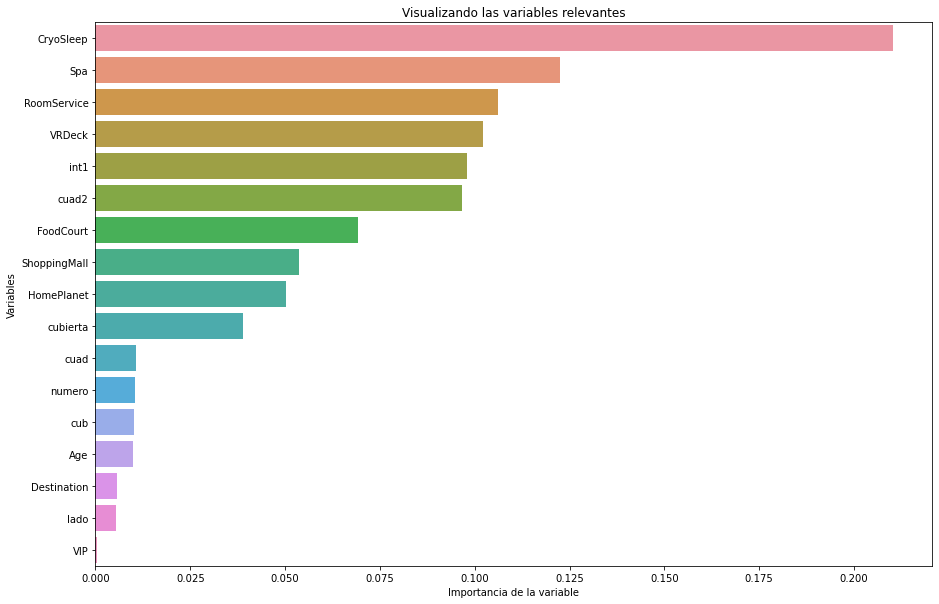

In [1254]:
plt.figure(figsize=(15,10))
# creamos el gráfico de barras
sns.barplot(x=feature_imp3, y=feature_imp3.index)
# agregamos estilo
plt.xlabel('Importancia de la variable')
plt.ylabel('Variables')
plt.title("Visualizando las variables relevantes")

#mostramos y cerramos gráfico
plt.show()

In [1146]:
##XGBOOST###
#https://www.datatechnotes.com/2019/07/classification-example-with.html

In [1279]:
##OJO QUE ESTE ES EL MEJOR MODELO!!
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [1280]:
from sklearn.model_selection import KFold

In [1281]:
xgbc = XGBClassifier()
print(xgbc)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.20, learning_rate=0.05,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.9, verbosity=1, eta=0.045, tree_method='approx',)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.045,
              eval_metric=None, gamma=0.2, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=1000, n_jobs=1, nthread=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [1282]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [1283]:
scores = cross_val_score(xgbc, x_train, y_train, cv=6)
print("Mean cross-validation score: %.2f" % scores.mean())

 
kfold = KFold(n_splits=6, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())


Mean cross-validation score: 0.80
K-fold CV average score: 0.8003


In [1284]:
test_predictions6 = xgbc.predict(x_test)
cm = confusion_matrix(y_test,test_predictions6) 
print(cm)

[[606 142]
 [165 652]]


In [1285]:
accuracy6 = accuracy_score(y_test, test_predictions6)
print("Accuracy test XGBOOST: %.2f%%" % (accuracy6 * 100.0))

Accuracy test XGBOOST: 80.38%


In [ ]:
##Otra forma##
#https://www.anyscale.com/blog/how-to-tune-hyperparameters-on-xgboost

In [1298]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
clf7 = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

clf7.fit(x_train, y_train)

best_combination = clf7.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
best_combination

{'subsample': 0.6,
 'num_class': 10,
 'n_estimators': 500,
 'max_depth': 6,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.8999999999999999}

In [1301]:
test_predictions7 = clf7.predict(x_test)
cm2 = confusion_matrix(y_test,test_predictions7) 
print(cm2)

[[602 146]
 [139 678]]


In [1302]:
accuracy7 = accuracy_score(y_test, test_predictions7)
print("Accuracy test XGBOOST: %.2f%%" % (accuracy7 * 100.0))


###RESPUESTA FINAL!!!###

Accuracy test XGBOOST: 81.79%


## Generar la salida para entregar

In [1303]:
test_df = pd.read_csv(r'D:\Documentos Mauricio\Desktop\Diplomatura FAMAF2022\4- Aprendizaje Supervisado\Descarga Clase 3 y 4\AprendizajeSupervisado-master\Práctico\test.csv')

In [1304]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


In [1305]:
test_df[['cubierta','numero','lado']] = test_df['Cabin'].str.split('/', expand=True)

In [1306]:
test_df.isna().sum()


PassengerId      0
HomePlanet      22
CryoSleep       21
Cabin           15
Destination     22
Age             17
VIP             19
RoomService     27
FoodCourt       28
ShoppingMall    20
Spa             25
VRDeck          19
Name            16
cubierta        15
numero          15
lado            15
dtype: int64

In [1201]:
#del test_df['numero']

In [1307]:
test_df['cuad']=test_df.Age * test_df.Age
test_df['cub']= test_df.Age * test_df.Age * test_df.Age 

test_df['cuad2']= test_df.RoomService * test_df.RoomService 
test_df['int1']= test_df.Age * test_df.VRDeck


Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [1308]:
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

In [1292]:
test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cubierta,numero,lado,cuad,cub,cuad2,int1
0,0.372375,1.184602,-1.836298,0.389487,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,1.988704,-0.321620,2.729789,0.145396,-0.048345,-0.195568,-0.244309
1,-0.784647,1.184602,-0.642293,-1.050400,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,0.868126,1.705306,0.846429,-0.870237,-0.658344,-0.195568,-0.244309
2,-0.784647,-0.699500,0.551713,1.075147,-0.194446,-0.344213,-0.309830,-0.274152,0.441916,-0.250575,0.868126,0.311672,-1.036930,0.948023,0.705872,-0.195278,-0.244309
3,-0.784647,-0.699500,-0.642293,2.377902,-0.194446,-0.385490,-0.310498,-0.152063,-0.309805,1.277745,-0.252452,-0.077295,0.846429,3.040001,3.416039,-0.195568,2.480037
4,0.372375,-0.699500,-1.836298,-1.256098,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,-1.933319,-0.976413,0.846429,-0.941239,-0.678021,-0.195568,-0.244309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.529396,-0.699500,0.551713,1.760807,-0.194446,0.882864,-0.310498,0.078379,0.019943,-0.250575,0.307837,1.163880,0.846429,1.956453,1.894076,0.078343,-0.244309
866,-0.784647,1.184602,0.551713,2.035071,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,0.868126,0.645910,0.846429,2.417450,2.512968,-0.195568,-0.244309
867,-0.784647,1.184602,-0.642293,-0.707570,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,0.868126,1.038786,-1.036930,-0.710741,-0.598589,-0.195568,-0.244309
868,-0.784647,-0.699500,0.551713,-0.707570,-0.194446,1.049852,-0.310498,-0.254312,-0.309805,-0.250575,0.307837,-0.632403,0.846429,-0.710741,-0.598589,0.155215,-0.244309


In [1293]:
x_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cubierta,numero,lado,cuad,cub,cuad2,int1
4349,-0.838536,-0.746493,0.579856,-0.128591,-0.209979,-0.329239,0.858735,-0.218948,-0.256410,0.332510,0.333634,-0.620811,0.850144,-0.321197,-0.388001,-0.125262,0.180901
5764,0.320042,-0.746493,0.579856,-0.198459,-0.209979,-0.329239,0.707455,-0.284910,-0.059557,7.160904,-1.830110,-0.804603,-0.989092,-0.376535,-0.423114,-0.125262,4.711555
2319,1.478619,1.108595,1.769839,-0.338197,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,0.333634,-0.468640,0.850144,-0.480948,-0.485642,-0.125262,-0.233635
2709,-0.838536,-0.746493,0.579856,0.220752,-0.209979,-0.329239,-0.272437,-0.266305,0.432129,-0.208883,0.333634,-0.136630,0.850144,-0.013180,-0.169938,-0.125262,-0.185943
827,0.320042,2.963683,-1.800110,-0.757408,-0.209979,-0.329239,-0.259363,-0.284910,-0.206529,2.310536,-1.830110,-0.867843,0.850144,-0.744067,-0.618829,-0.125262,0.954403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,-0.838536,1.108595,0.579856,2.037333,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,0.874570,-0.992347,0.850144,2.430069,2.535543,-0.125262,-0.233635
1872,1.478619,-0.746493,0.579856,0.639963,-0.209979,-0.201482,0.434156,1.039407,-0.266208,-0.267088,0.333634,2.189418,-0.989092,0.425352,0.198428,-0.123417,-0.233635
5153,1.478619,1.108595,0.579856,0.639963,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,0.333634,-0.557571,-0.989092,0.425352,0.198428,-0.125262,-0.233635
7584,-0.838536,-0.746493,-1.800110,-0.408065,-0.209979,-0.286158,-0.256873,-0.283219,2.261702,-0.267088,0.333634,-0.154416,0.850144,-0.530021,-0.513256,-0.125052,-0.233635


Generamos la salida

In [1309]:
test_id = PassengerId
test_pred = clf7.predict(test_df)




In [1310]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv(r'D:\Documentos Mauricio\Desktop\Diplomatura FAMAF2022\4- Aprendizaje Supervisado\sample_submission.csv', header=True, index=False)